#### 학습목표
- 시각화 패키지 matplotlib
- 서브 패키지 pyplot
- 고급 패키지 seaborn
- 지도 시각화 folium
- 현업(BI) Tablue

In [4]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt   # 시각화 도와주는 패키지
import json   as j 

# 
import seaborn as sns 
import folium as f

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [5]:
def aryInfo(ary) : 
    print('type - ' , type(ary)) 
    print('shape - ' , ary.shape)
    print('ndim  - ' , ary.ndim)
    print('dtype - ' , ary.dtype)
    print()
    print('data  -')
    print(ary) 

def seriesInfo(s) :
    print('type   - ' , type(s)) 
    print('index  - ' , s.index) 
    print('values - ' , s.values)
    print('dtype  - ' , s.dtype)
    print()
    print('data  -')
    print(s) 

def frmInfo(frm) : 
    print('type    - ' , type(frm))
    print('shape   - ' , frm.shape)
    print('ndim    - ' , frm.ndim)
    print('row idx - ' , frm.index , type(frm.index))
    print('col idx - ' , frm.columns , type(frm.columns))
    print('values  - ' , type(frm.values))
    print(frm.values)
    print('data - ')
    display(frm)

In [6]:
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')    

plot 유형
- 선, 막대, 박스, 히스토그램 etc..


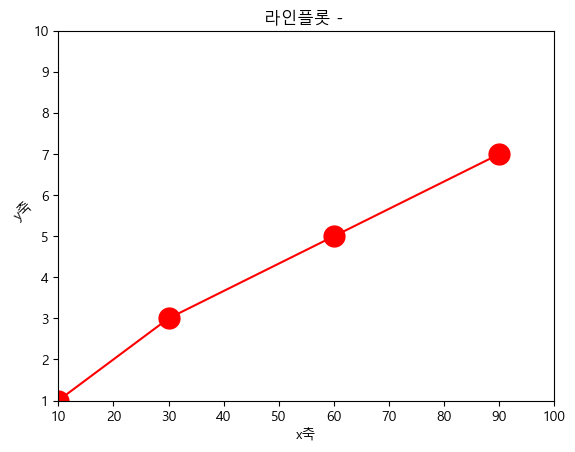

In [7]:
# 그림판 파일 하나 생성하는 것(기본 문법)
plt.figure()

# plt.plot([1,2,3,4,5,6,7,8,9])   # list 생성
# plt.plot([1,4,5,2,6,8,7,9,3])

plt.plot([10,30,60,90],[1,3,5,7],    #([x축],[y축])
        color = 'red',   # 색깔 지정
        marker = 'o',    # marker 모양
        ms = 15)      # mark size

plt.title('라인플롯 - ')   # 라인차트 그리는 것
plt.xlabel('x축')  # 축 이름 지정
plt.ylabel('y축', rotation = 45)    # 방향 지정
plt.xlim(10,100)   # x축의 limit 지정 
plt.ylim(1,10)     # y축의 limit 지정
plt.show()
plt.close()

- 시도별전출입인구수.xlsx

In [8]:
popFrm = pd.read_excel('../../data/시도별 전출입 인구수.xlsx',
                      header = 0)     # header 설정
popFrm.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [9]:
popFrm['전출지별'].unique()

array(['전출지별', '전국', nan, '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [10]:
popFrm.fillna(method='ffill', inplace = True)   # 결측값 대체

In [11]:
popFrm.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [12]:
print('Q1) 서울에서 다른지역으로 이동한 데이터만 추출하여 seoulFrm 서브셋을 만들어보자 - ')
# 전출지 : 서울특별시 / 전입지 : 다른 지역인 경우 찾기


Q1) 서울에서 다른지역으로 이동한 데이터만 추출하여 seoulFrm 서브셋을 만들어보자 - 


In [13]:
popFrm['전출지별'].unique()

array(['전출지별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [14]:
# bool indexing
# (popFrm['전출지별'] == '서울특별시') & (popFrm['전입지별'] != '서울특별시')

seoulFrm = popFrm[(popFrm['전출지별'] == '서울특별시') &
                    (popFrm['전입지별'] != '서울특별시')]
seoulFrm

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [15]:
print('Q2) 전출지별 열 인덱스를 삭제 - drop ')
seoulFrm.drop('전출지별',axis = 1, inplace = True)

Q2) 전출지별 열 인덱스를 삭제 - drop 


In [16]:
seoulFrm

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [17]:
print('Q3) 전입지별 -> 전입지 변경 - rename')
seoulFrm.rename({'전입지별':'전입지'}, axis = 1, inplace = True)

Q3) 전입지별 -> 전입지 변경 - rename


In [18]:
seoulFrm

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [19]:
print('Q4) 전입지를 인덱스로 구성 - ')
seoulFrm.set_index('전입지', inplace = True)

Q4) 전입지를 인덱스로 구성 - 


In [20]:
seoulFrm.index

Index(['전국', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지')

In [21]:
print('경기도로 전입한 인구 데이터 추출 - ')
# seoulFrm[] # 데이터 프레임의 열인덱스 추출 방법 (비교)
seoulPop = seoulFrm.loc['경기도' , : ] # 데이터 프레임의 행인덱스 추출(loc)  # 시리즈임
print('type -  ',type(seoulPop))
print('value - ', seoulPop.values)
print('index - ', seoulPop.index)


경기도로 전입한 인구 데이터 추출 - 
type -  <class 'pandas.core.series.Series'>
value -  [130149 150313 93333 143234 149045 253705 202276 207722 237684 278411
 297539 252073 320174 400875 352238 390265 412535 405220 415174 412933
 473889 384714 428344 502584 542204 599411 520566 495454 407050 471841
 435573 499575 516765 457656 400206 414621 449632 431637 412408 398282
 410735 373771 354135 340801 332785 359337 370760 342433]
index -  Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')


서울 -> 경기도 이동한 인구 데이터를 시각화 -


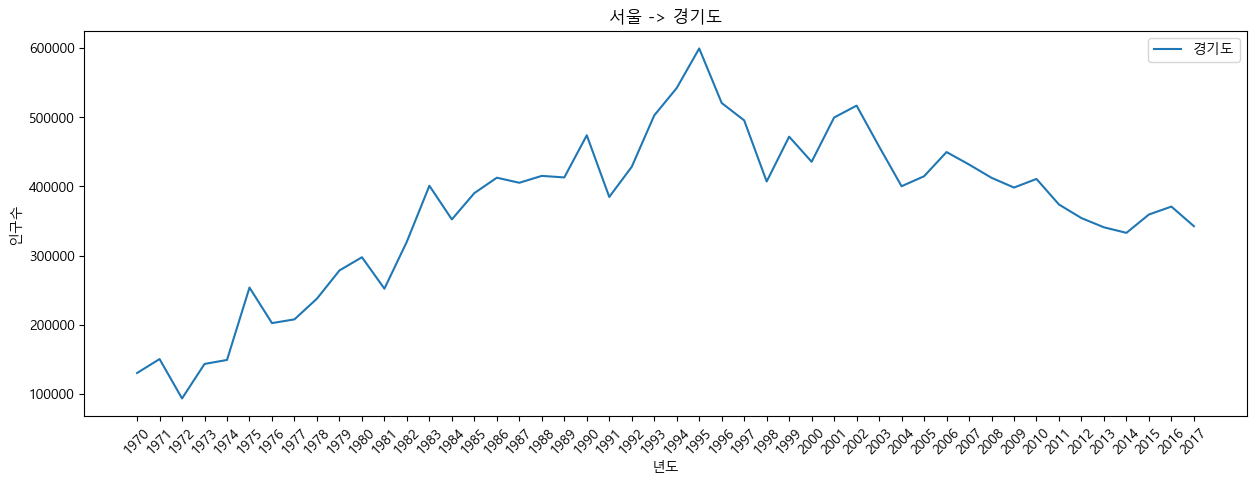

In [22]:
print('서울 -> 경기도 이동한 인구 데이터를 시각화 -')
# 라인차트 만들기
plt.figure(figsize = (15,5))   # figure size 설정

plt.plot(seoulPop.index, seoulPop.values, label = '경기도')   # 시계열 데이터

plt.title('서울 -> 경기도')
plt.xlabel('년도')
plt.ylabel('인구수')
plt.legend(loc = 'best')    # 범례 설정 (+ label 설정 함께)
plt.xticks(rotation = 45)
plt.show()
plt.close()

Q4) 충청남도, 경상북도, 전라남도로 이동한 인구 데이터를 시각화 - 


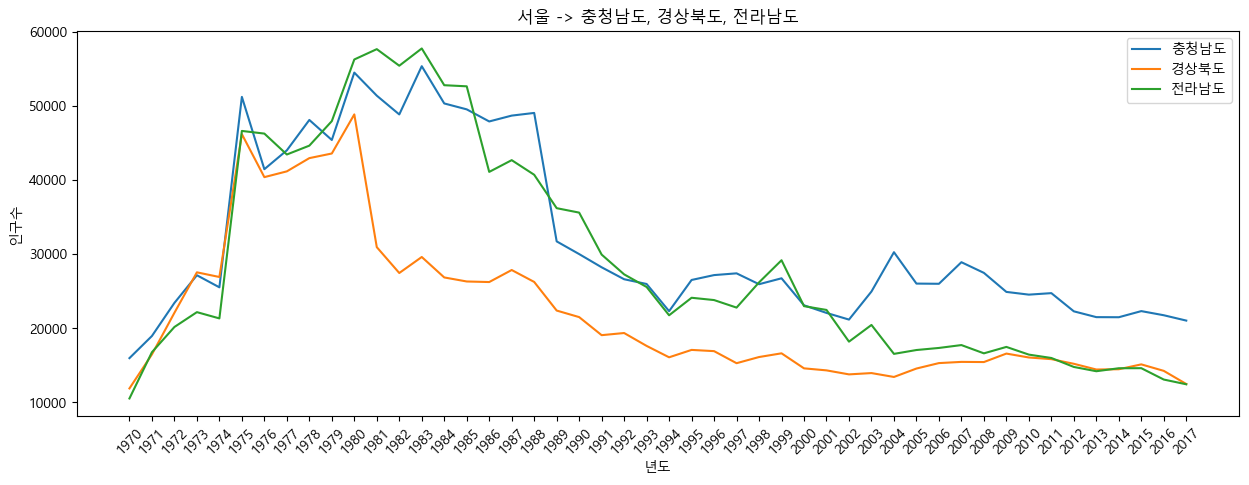

In [23]:
print('Q4) 충청남도, 경상북도, 전라남도로 이동한 인구 데이터를 시각화 - ')
plt.figure(figsize = (15,5))   # figure size 설정

# 시계열 데이터
# x축 : 연도 , y축 : 데이터
plt.plot(seoulFrm.columns , seoulFrm.loc['충청남도'].values , label = '충청남도')  
plt.plot(seoulFrm.columns , seoulFrm.loc['경상북도'].values , label = '경상북도') 
plt.plot(seoulFrm.columns , seoulFrm.loc['전라남도'].values , label = '전라남도') 

plt.title('서울 -> 충청남도, 경상북도, 전라남도')
plt.xlabel('년도')
plt.ylabel('인구수')
plt.legend(loc = 'best')    # 범례 설정 (+ label 설정 함께)
plt.xticks(rotation = 45)
plt.show()
plt.close()

In [24]:
seoulFrm.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [25]:
seoulFrm.loc['충청남도']

1970    15954
1971    18943
1972    23406
1973    27139
1974    25509
1975    51205
1976    41447
1977    43993
1978    48091
1979    45388
1980    54480
1981    51369
1982    48834
1983    55344
1984    50318
1985    49520
1986    47888
1987    48678
1988    49038
1989    31707
1990    29993
1991    28211
1992    26600
1993    25958
1994    22293
1995    26501
1996    27159
1997    27395
1998    25928
1999    26726
2000    23083
2001    22056
2002    21155
2003    24942
2004    30246
2005    26012
2006    25986
2007    28898
2008    27458
2009    24889
2010    24522
2011    24723
2012    22269
2013    21486
2014    21473
2015    22299
2016    21741
2017    21020
Name: 충청남도, dtype: object

- subplot

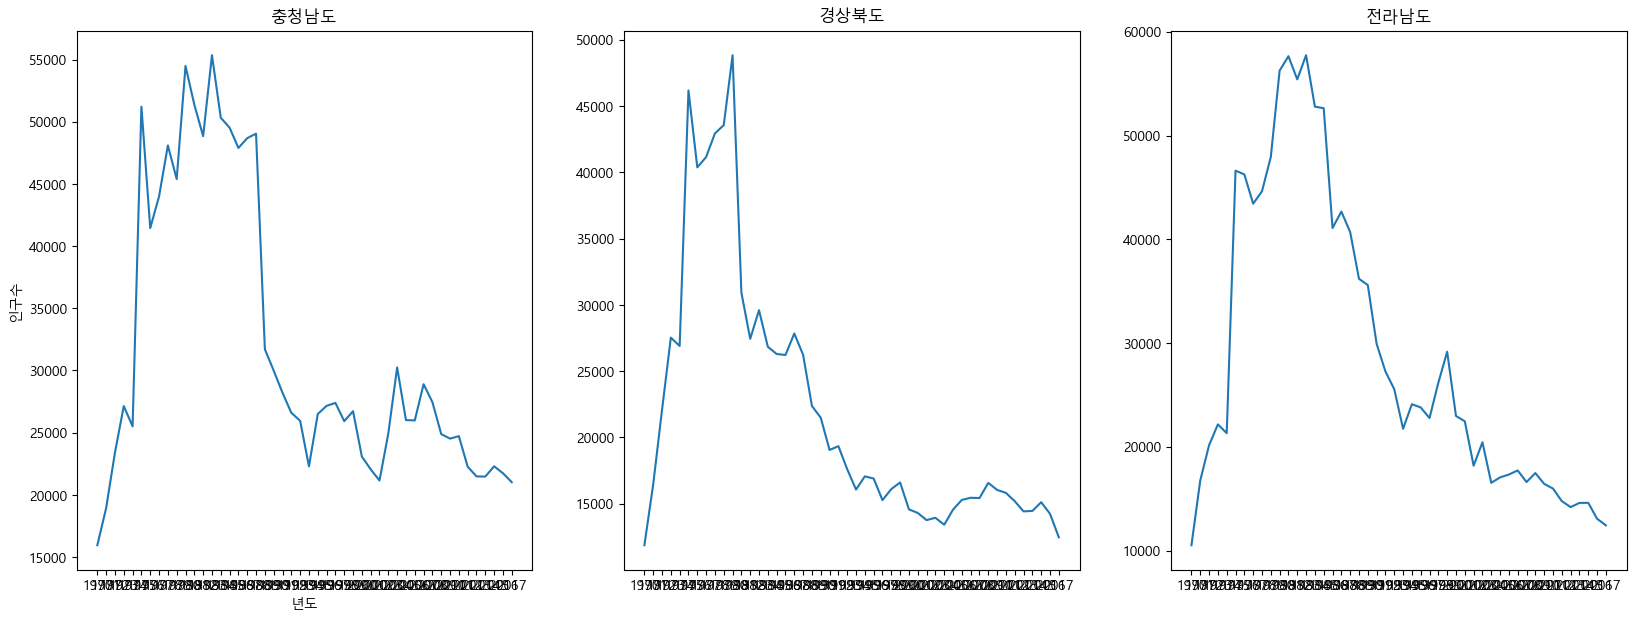

In [82]:
# 서브 플롯

fig = plt.figure(figsize = (20,7))

area01 = fig.add_subplot(1,3,1)      # 1행 3열의 1번째
area01.set_title('충청남도')
area01.plot(seoulFrm.columns , seoulFrm.loc['충청남도'].values , label = '충청남도')
area01.set_xlabel('년도')
area01.set_ylabel('인구수')

area02 = fig.add_subplot(1,3,2)     # 1행 3열의 2번째
area02.set_title('경상북도')
area02.plot(seoulFrm.columns , seoulFrm.loc['경상북도'].values , label = '경상북도')

area03 = fig.add_subplot(1,3,3)     # 1행 3열의 3번째
area03.set_title('전라남도')
area03.plot(seoulFrm.columns , seoulFrm.loc['전라남도'].values , label = '전라남도') 

plt.show()
plt.close()

- bar chart (막대그래프) : x축이 범주형(category)

In [27]:
titanicFrm = sns.load_dataset('titanic')
titanicFrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
print('Q1) 선실등급별 생존자 합을 추출하고 싶다면 - ')
# titanicFrm.groupby('pclass').get_group(1)  # (1)등실 데이터만 출력
# titanicFrm.groupby('pclass')['survived'] # series
# titanicFrm.groupby('pclass')['survived'].sum().index
titanicFrm.groupby('pclass')['survived'].sum().values

Q1) 선실등급별 생존자 합을 추출하고 싶다면 - 


array([136,  87, 119], dtype=int64)

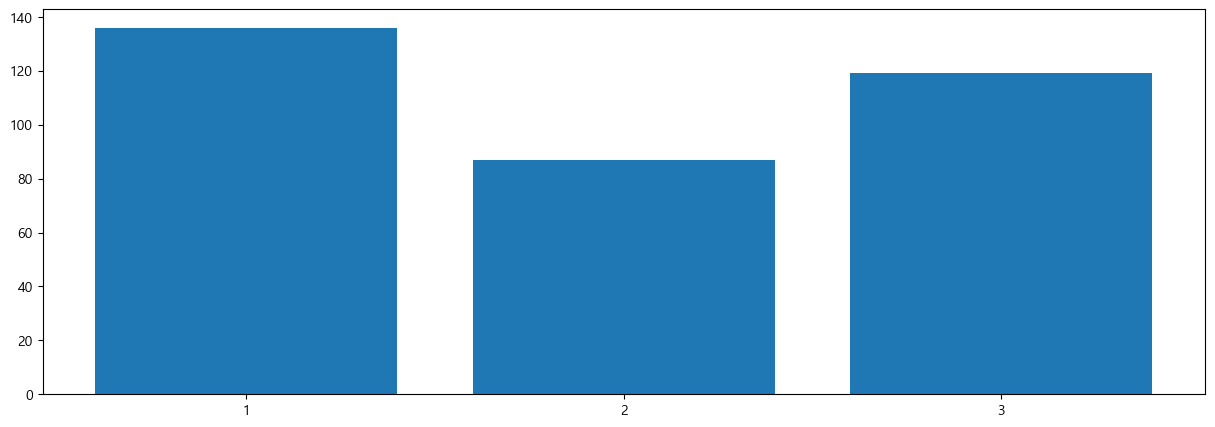

In [29]:
# 시각화 ( 수직 )
plt.figure(figsize=(15,5))

plt.bar(titanicFrm.groupby('pclass')['survived'].sum().index,
        titanicFrm.groupby('pclass')['survived'].sum().values)

plt.xticks(titanicFrm.groupby('pclass')['survived'].sum().index)
plt.show()
plt.close()

([<matplotlib.axis.YTick at 0x226975f9e50>,
 [Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

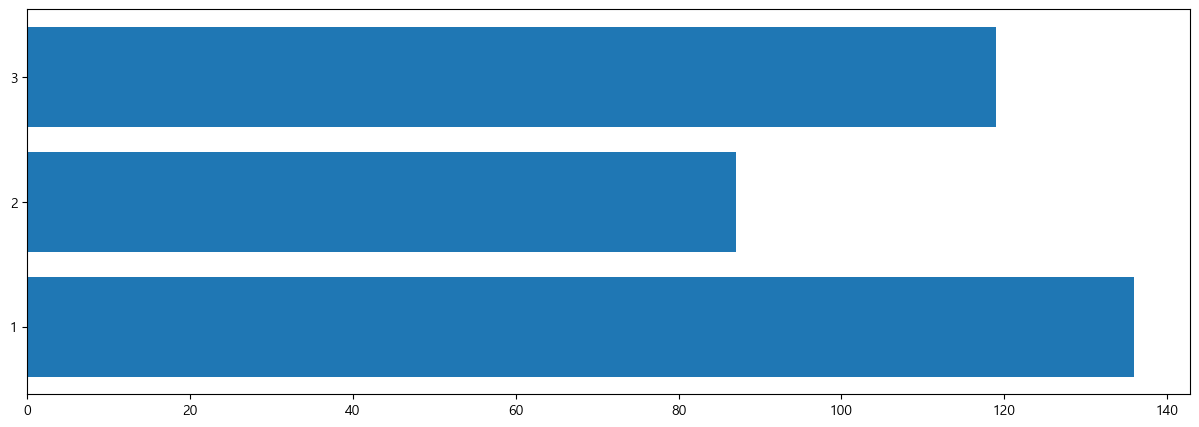

In [30]:
# 시각화 (수평)
plt.figure(figsize=(15,5))

plt.barh(titanicFrm.groupby('pclass')['survived'].sum().index,
        titanicFrm.groupby('pclass')['survived'].sum().values)

plt.yticks(titanicFrm.groupby('pclass')['survived'].sum().index)


In [31]:
print('Q1) 서브셋 구축')
print('조건1) 전입지역 - 충청남도, 경상북도, 강원, 전라남도')
print('조건2) 2010 ~ 2017년 까지만')

Q1) 서브셋 구축
조건1) 전입지역 - 충청남도, 경상북도, 강원, 전라남도
조건2) 2010 ~ 2017년 까지만


In [32]:
# subset = popFrm['전입지역']
# seoulFrm.index    # index 확인
# (seoulFrm['전입지역'] == '충청남도')   # 전입지역이 '충청남도'인 결과만 조회
subsetFrm= seoulFrm.loc[['충청남도', '경상북도', '강원도', '전라남도'], '2010':'2017' ]

In [103]:
subsetFrm

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [112]:
print('년도에 따른 전입지역의 인구 전입수를  bar 시각화')
subsetFrm

년도에 따른 전입지역의 인구 전입수를  bar 시각화


,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


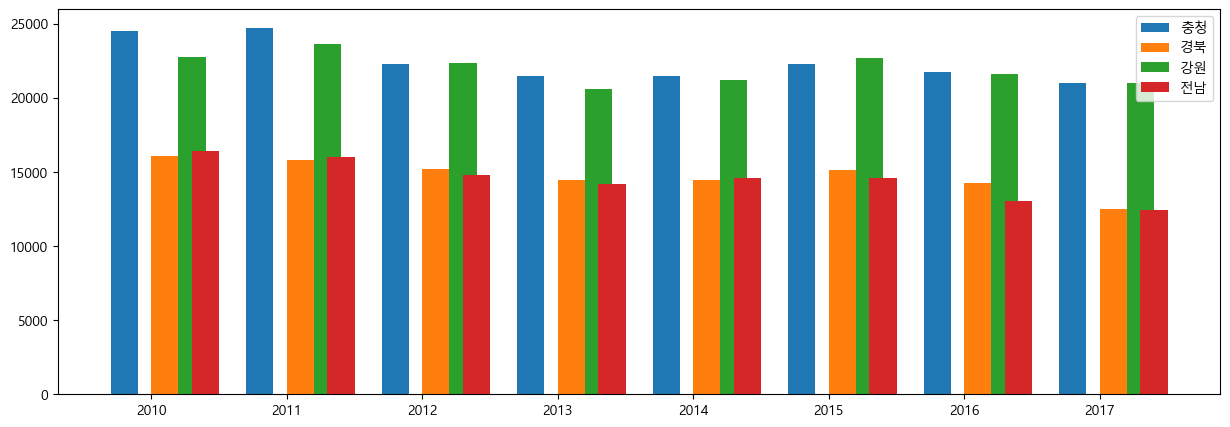

In [108]:
# case 01
# c xtick 와 shpae이 맞지 않음  
# multi-bar 만들기 위해서는
# T.index 해주어야 한다 -> 축의 개수, data 개수 맞춰줘야 함

plt.figure(figsize = (15, 5))

x_axis = np.arange(len(subsetFrm.T.index))   # index의 길이 만큼 범위 지정
plt.bar(x_axis-0.2 , subsetFrm.T['충청남도'] , width = 0.2 , label = '충청')    # 그래프 축 겹침 등 설정
plt.bar(x_axis+0.1 , subsetFrm.T['경상북도'] , width = 0.2 , label = '경북')
plt.bar(x_axis+0.3 , subsetFrm.T['강원도'] ,   width = 0.2 , label = '강원')
plt.bar(x_axis+0.4 , subsetFrm.T['전라남도'] , width = 0.2 , label = '전남')

plt.xticks(x_axis , subsetFrm.T.index)    # x축 눈금 위치, x축 눈금 레이블

plt.legend(loc = 'best')    # 범례 추가(best : 자동으로 최적 위치에 추가됨)
plt.show()
plt.close()

In [99]:
players = ['player01' , 'player02' , 'player03' , 'player04'] 
females = [5,8,4,7]
males   = [6,4,9,5]

x_axis = np.arange(len(players))
print('x_axis - ' , x_axis)

x_axis -  [0 1 2 3]


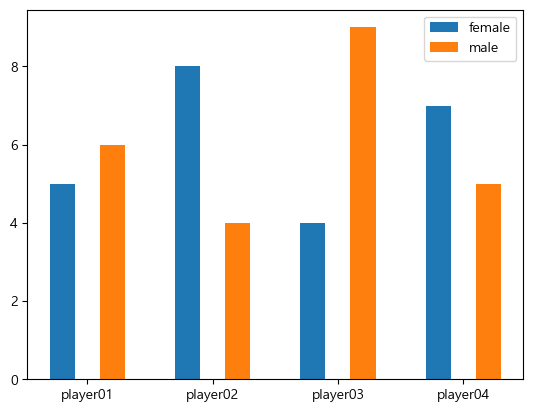

In [100]:
plt.figure() 

# multi bar
plt.bar(x_axis-0.2 , females , width = 0.2 , label = 'female')
plt.bar(x_axis+0.2 , males , width = 0.2   , label = 'male')


plt.xticks(x_axis , players)
plt.legend()
plt.show()
plt.close()


In [109]:
print('case02 - ')
t_subsetFrm = subsetFrm.T
t_subsetFrm

case02 - 


전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


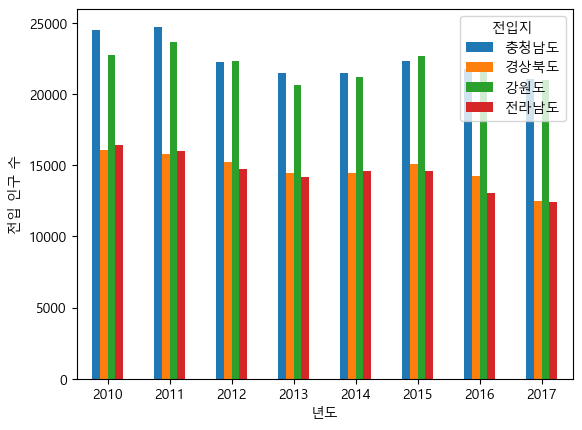

In [96]:
t_subsetFrm.plot(kind = 'bar')

plt.xlabel('년도')
plt.ylabel('전입 인구 수')

plt.xticks(rotation = 0)
plt.show()
plt.close()

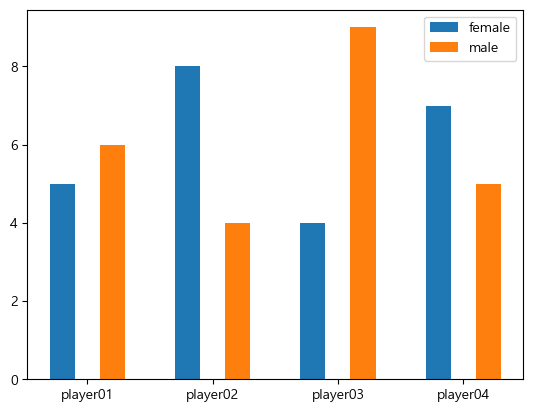

In [102]:
plt.figure() 

# multi bar
plt.bar(x_axis-0.2 , females , width = 0.2 , label = 'female')
plt.bar(x_axis+0.2 , males , width = 0.2   , label = 'male')


plt.xticks(x_axis , players)
plt.legend()
plt.show()
plt.close()

In [36]:
# case 02
t_subsetFrm= subsetFrm.T
t_subsetFrm

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


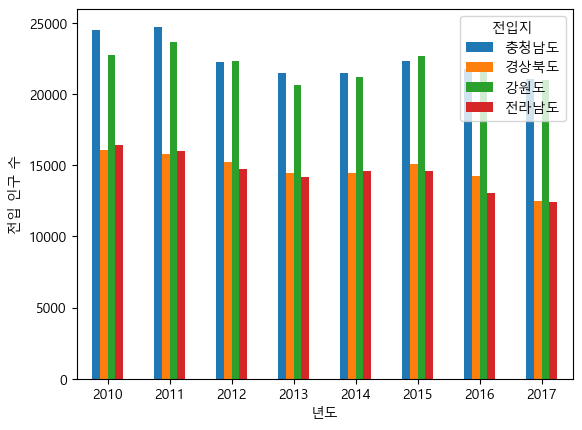

In [37]:
t_subsetFrm.plot(kind = 'bar')

plt.xlabel('년도')
plt.ylabel('전입 인구 수')
plt.xticks(rotation=0)
plt.show()
plt.close()

In [38]:
print('Q1) 기존 subset에 전입 인구 수 합계를 추가')

subsetFrm['합계'] = subsetFrm.sum(axis = 1)    # 행방향 합계 구함
subsetFrm

Q1) 기존 subset에 전입 인구 수 합계를 추가


,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


In [39]:
print('합계를 기준으로 내림차순정렬')

# subsetFrm['합계']    # => series
# subsetFrm['합계'].sort_values(ascending = False) # => frame 생성

sum_subsetFrm = subsetFrm[['합계']].sort_values(by='합계',ascending=False)

합계를 기준으로 내림차순정렬


정렬된 결과를 수평막대그래프로 시각화


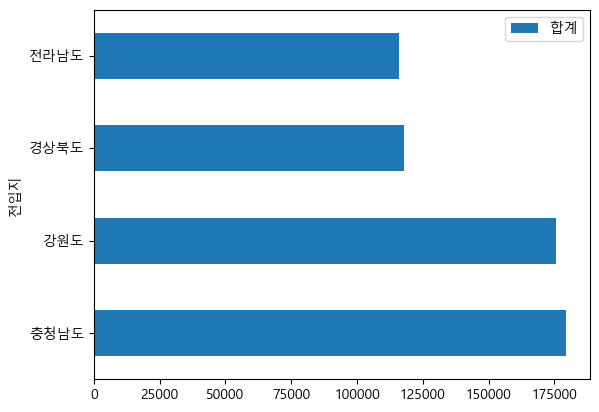

In [40]:
print('정렬된 결과를 수평막대그래프로 시각화')
sum_subsetFrm.plot(kind = 'barh')

plt.show()
plt.close()

In [41]:
irisFrm = sns.load_dataset('iris')
irisFrm.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
print('bar chart 최종목표')
print('feature(열) 이름 변경 sepal_length -> 꽃받침 길이')
print('feature(열) 이름 변경 species -> target')
irisFrm.rename({'sepal_length' : '꽃받침 길이', 
               'sepal_width' : '꽃받침 너비',
               'petal_length' : '꽃잎 길이',
               'petal_width' : '꽃잎 너비',
               'species' : 'target'}, axis = 1 , inplace = True)
irisFrm


bar chart 최종목표
feature(열) 이름 변경 sepal_length -> 꽃받침 길이
feature(열) 이름 변경 species -> target


,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
print('종(target)을 기준으로 그룹화 - groupby')
# irisFrm.groupby('target').get_group('setosa') # 'setosa 로 그룹화'
mean_irisFrm = irisFrm.groupby('target').mean()  # 평균
mean_irisFrm.columns
# irisFrm.groupby('target').mean()[['꽃받침 길이']]


종(target)을 기준으로 그룹화 - groupby


Index(['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비'], dtype='object')

In [44]:
print('그룹에 대한 각 피처의 평균을 구한다')
irisFrm.groupby('target').mean()

그룹에 대한 각 피처의 평균을 구한다


,꽃받침 길이,꽃받침 너비,꽃잎 길이,꽃잎 너비
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


평균을 내림차순 정렬하여 
종별 평균을 막대그래프로 시각화


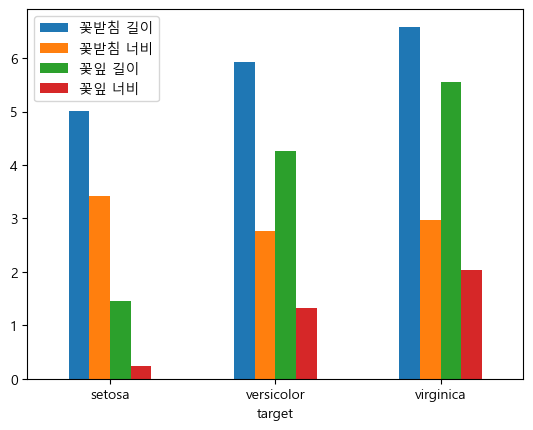

In [45]:
print('평균을 내림차순 정렬하여 ')
print('종별 평균을 막대그래프로 시각화')

mean_irisFrm.plot(kind = 'bar')
# mean_irisFrm.plot(kind = 'barh')   #=> 가로 그래프
plt.legend(loc='best')
plt.xticks(rotation= 0)
plt.show()
plt.close()

<Axes: >

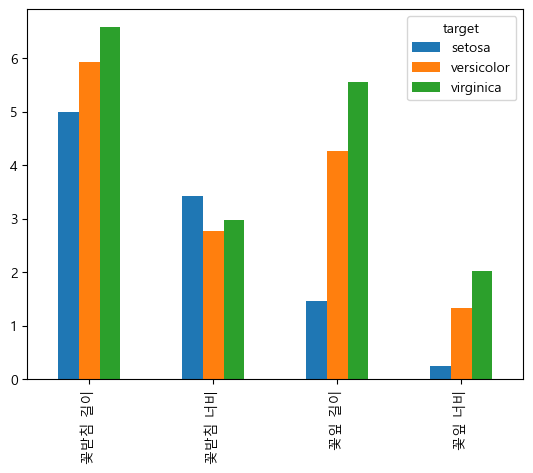

In [46]:
mean_irisFrm.T.plot(kind = 'bar')

In [47]:
print('area plot - ')
print('subset 만들기 - ')
subsetFrm.index
subsetFrm.columns


area plot - 
subset 만들기 - 


Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '합계'], dtype='object')

In [113]:
print('컬럼 인덱스를 정수로 변경하라 - ')
# print(subsetFrm.columns.values)
subsetFrm.drop('합계', axis=1, inplace=True)


컬럼 인덱스를 정수로 변경하라 - 


KeyError: "['합계'] not found in axis"

In [51]:
print(subsetFrm.columns.values)

['2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017']


In [53]:
subsetFrm.columns = subsetFrm.columns.values.astype('int')
subsetFrm.columns    # => int64로 변경된 것 알 수 있다.

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

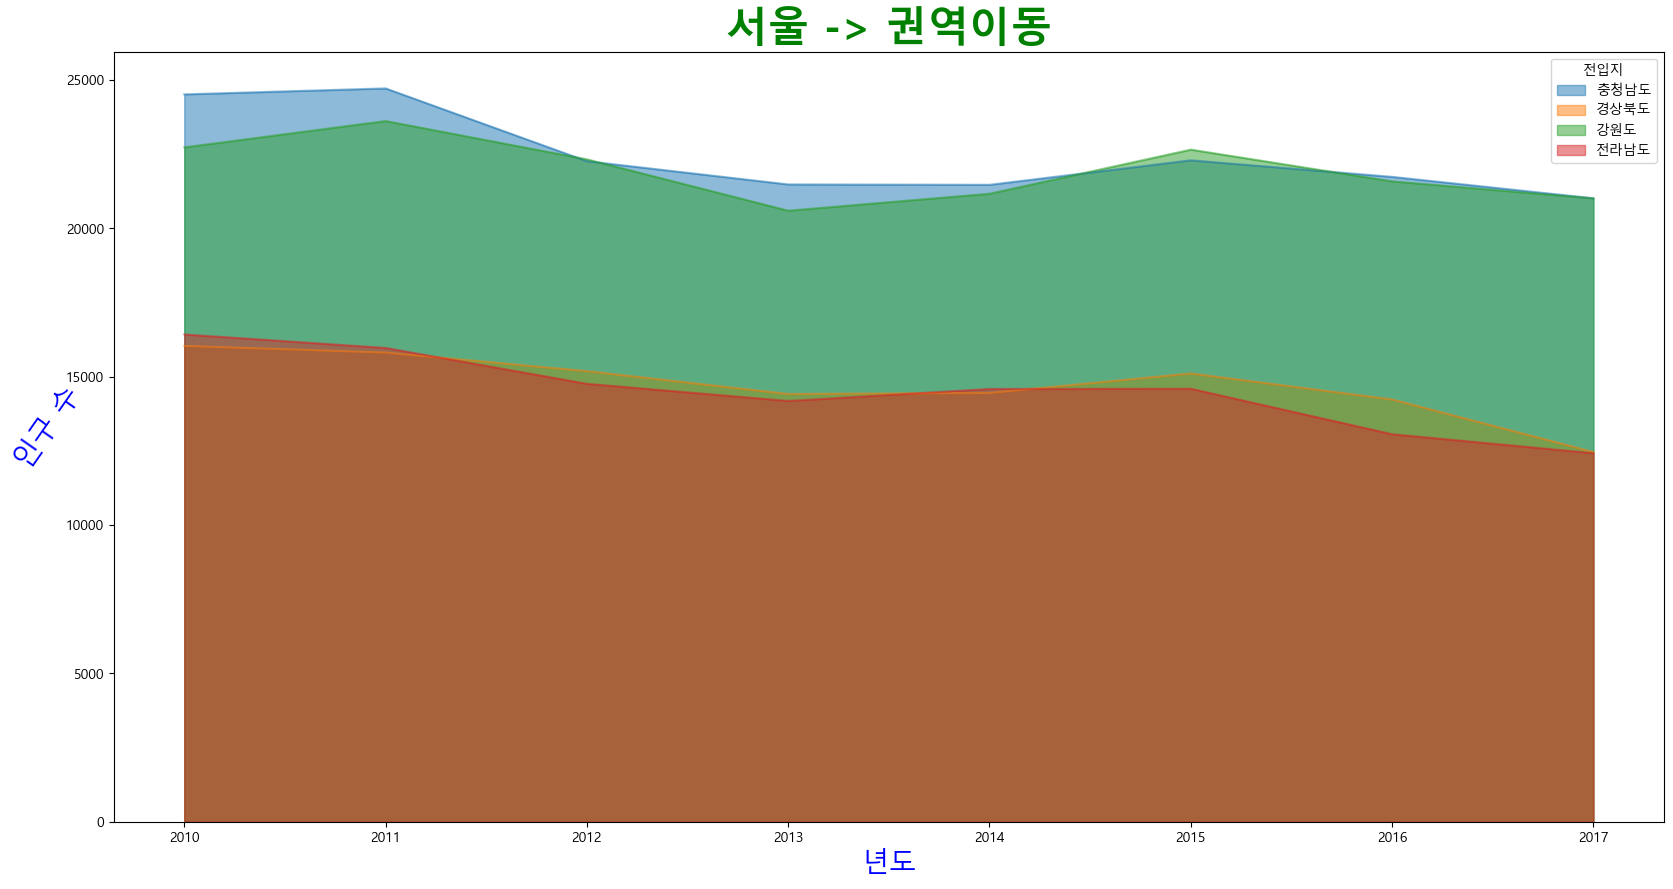

In [114]:
# => 면적으로 출력 / alpha : 투명도
subsetFrm.T.plot(kind='area', figsize=(20,10), alpha = 0.5, stacked = False)  

# option 설정
plt.title('서울 -> 권역이동', size = 30, color = 'green', weight = 'bold')
plt.xlabel('년도', color = 'blue', size = 20)
plt.ylabel('인구 수', color = 'blue', size = 20, rotation = 55)
plt.show()
plt.close()

- mpgFrm

In [66]:
mpgFrm = pd.read_excel('../../data/mpg_visualization.xlsx',
                       index_col= 0) 
# 읽어들여서 옵션 사용 or index_col 사용
mpgFrm.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


산점도 - scatter plot


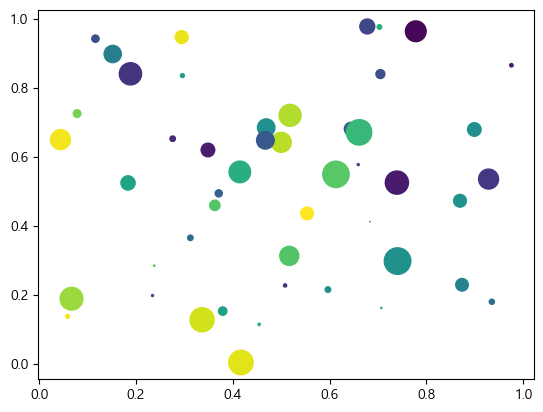

In [111]:
print('산점도 - scatter plot')
x= np.random.rand(50)
y= np.random.rand(50)

plt.figure()

area = (20* np.random.rand(50))**2
# print(area)

colors = np.random.rand(50)
plt.scatter(x,y, s= area , c = colors)

plt.show()
plt.close()